In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [24]:
df = pd.read_csv("./dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
X = df.iloc[:, [1,2,3]].values
print(X)

[[148  72  35]
 [ 85  66  29]
 [183  64   0]
 ...
 [121  72  23]
 [126  60   0]
 [ 93  70  31]]


In [26]:
len(X)

768

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.84832379  0.14964075  0.90726993]
 [-1.12339636 -0.16054575  0.53090156]
 [ 1.94372388 -0.26394125 -1.28821221]
 ...
 [ 0.00330087  0.14964075  0.15453319]
 [ 0.1597866  -0.47073225 -1.28821221]
 [-0.8730192   0.04624525  0.65635768]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


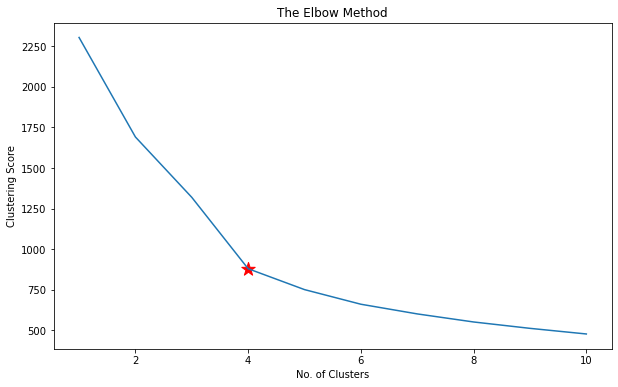

In [28]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    #kmeans = KMeans(n_clusters=i, init ='k-means++',random_state=0 )
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(4,clustering_score[3], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [29]:
kmeans= KMeans(n_clusters = 4, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([1, 2, 3, 2, 2, 3, 2, 0, 1, 3, 3, 3, 3, 1, 1, 0, 1, 3, 2, 2, 1, 3,
       3, 2, 1, 2, 3, 2, 1, 3, 2, 1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 2, 1,
       3, 1, 3, 2, 2, 0, 3, 2, 2, 1, 1, 2, 1, 2, 3, 2, 0, 3, 2, 1, 3, 2,
       2, 3, 2, 1, 2, 1, 3, 3, 2, 2, 3, 2, 0, 2, 2, 0, 2, 2, 3, 2, 2, 2,
       1, 2, 3, 3, 2, 3, 1, 1, 2, 2, 2, 1, 3, 3, 3, 2, 3, 2, 3, 1, 2, 2,
       1, 1, 2, 3, 1, 3, 3, 3, 2, 2, 1, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1, 3,
       1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 3, 3, 3, 1, 0, 2, 2, 1,
       3, 1, 3, 3, 3, 2, 2, 3, 3, 1, 1, 1, 2, 1, 3, 2, 3, 0, 2, 1, 3, 2,
       2, 1, 3, 3, 2, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 3,
       1, 3, 0, 1, 2, 2, 3, 1, 1, 2, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 2,
       3, 2, 1, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 1, 1, 1, 0, 2, 3,
       3, 2, 0, 1, 3, 0, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 3, 3, 3, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 2, 3, 0,

In [30]:
score = silhouette_score(X, pred)
print("Silhouette Score:", score)

Silhouette Score: 0.3507693374884157


In [31]:
len(pred)

768

In [32]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())

Number of data points in each cluster= 
 2    325
3    225
1    182
0     36
Name: Cluster, dtype: int64


Text(0.5, 1.0, 'Clusters')

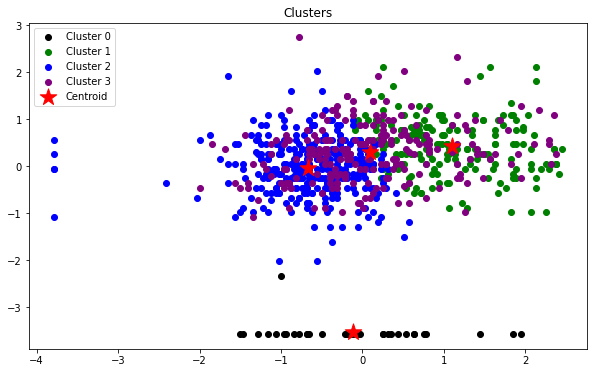

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1],c = 'black', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1],c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1],c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
#plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

#plt.xlabel('SepalLengthCm')
#plt.ylabel('SepalWidthCm')
plt.legend()
plt.title('Clusters')

In [14]:
kmeans.cluster_centers_[:,0]

array([ 0.11643489, -1.16250293,  0.96931639])

In [15]:
kmeans.cluster_centers_[:,1]

array([-0.128236  , -1.00206653,  1.04257713])

In [16]:
kmeans.cluster_centers_[:,2]

array([-0.88183813,  0.89510445, -0.02890354])

In [17]:
kmeans.cluster_centers_[:,3]

array([ 0.25333671, -1.30297509,  0.97520033])

In [18]:
distance = []
max0 = max1 = max2 = max3 = max4 = 0
for i in range(0, len(X)):
    if pred[i]==0:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][0])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][0])**2+(X[:, 2][i] - kmeans.cluster_centers_[:,2][0])**2+(X[:, 3][i] - kmeans.cluster_centers_[:,3][0])**2)
        if d>max0:
            max0=d
    if pred[i]==1:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][1])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][1])**2+(X[:, 2][i] - kmeans.cluster_centers_[:,2][1])**2+(X[:, 3][i] - kmeans.cluster_centers_[:,3][1])**2)
        if d>max1:
            max1=d
    if pred[i]==2:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][2])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][2])**2+(X[:, 2][i] - kmeans.cluster_centers_[:,2][2])**2+(X[:, 3][i] - kmeans.cluster_centers_[:,3][2])**2)
        if d>max2:
            max2=d
#    if pred[i]==3:
#        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][3])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][3])**2)
#        if d>max3:
#            max3=d
#    if pred[i]==4:
#        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][4])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][4])**2)
#        if d>max4:
#            max4=d
    distance.append(d) 

In [19]:
distance

[0.5847301827108115,
 1.1610452146750287,
 0.8535157405458527,
 1.0562593163471443,
 0.5953017414435751,
 1.2484124709066953,
 0.6639413243119922,
 0.40837733532735504,
 1.5048808624445598,
 0.8745438005404516,
 0.8265394404872873,
 0.419204867705454,
 1.0906909585317839,
 1.3798478236019889,
 1.629178146903789,
 2.378633136333293,
 1.178882389306834,
 0.2405609105736093,
 1.1894651098382087,
 0.8459742486236096,
 0.501787197384403,
 0.6129202101400881,
 0.680649826013843,
 0.3669935132643647,
 0.3717154668667156,
 1.0232212145377493,
 0.1296218320169135,
 0.2700421203679147,
 0.2603243421944201,
 0.6896450483307202,
 0.8453103328462219,
 0.5003168897426068,
 1.552219668106262,
 1.8635533980340497,
 0.8329485544123317,
 0.6298199342439398,
 0.6678341310592747,
 0.8544486279029682,
 1.307436989996605,
 0.3700699994680835,
 0.40245560004807707,
 2.551993923294195,
 1.0232166685845172,
 0.46269301964187887,
 0.9856540743278375,
 1.1585623043796653,
 0.9803706328723238,
 0.919037195423331,

In [20]:
len(distance)

150

In [21]:
max0

2.551993923294195

In [22]:
max1

2.378633136333293

In [23]:
max2

2.3604259639907643

In [24]:
l0 = float(input("Enter lambda 0 value: "))
l1 = float(input("Enter lambda 1 value: "))
l2 = float(input("Enter lambda 2 value: "))
# l3 = float(input("Enter lambda 3 value: "))
# l4 = float(input("Enter lambda 4 value: "))

Enter lambda 0 value: 1.5
Enter lambda 1 value: 1.3
Enter lambda 2 value: 1.3


In [25]:
c0=c1=c2=0
coordinates =[]
plt.figure(figsize=(10,6))
for i in range(0, len(X)):
    if pred[i]==0:
        if distance[i]<=max0-l0:
            #plt.scatter(X[pred == 0, 0][c0], X[pred == 0, 1][c0], c = 'black')#, label = 'Cluster 0')
            coordinates.append((X[pred == 0, 0][c0],X[pred == 0, 1][c0],X[pred == 0, 2][c0],X[pred == 0, 3][c0]))
            c0=c0+1
        else:
            c0=c0+1
    if pred[i]==1:
        if distance[i]<=max1-l1:
            #plt.scatter(X[pred == 1, 0][c1], X[pred == 1, 1][c1], c = 'green')#, label = 'Cluster 1')
            coordinates.append((X[pred == 1, 0][c1],X[pred == 1, 1][c1],X[pred == 1, 2][c1],X[pred == 1, 3][c1]))
            c1=c1+1
        else:
            c1=c1+1
    if pred[i]==2:
        if distance[i]<=max2-l2:
            #plt.scatter(X[pred == 2, 0][c2], X[pred == 2, 1][c2], c = 'blue')#, label = 'Cluster 2')
            coordinates.append((X[pred == 2, 0][c2],X[pred == 2, 1][c2],X[pred == 2, 2][c2],X[pred == 2, 3][c2]))
            c2=c2+1
        else:
            c2=c2+1
    
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')
# plt.xlabel('SepalLengthCm')
# plt.ylabel('SepalWidthCm')
# plt.legend()
# plt.title('Clusters')

<Figure size 720x432 with 0 Axes>

In [26]:
coordinates

[(-1.7205420368774056,
  -0.9006811702978088,
  1.0320572244889565,
  -1.3412724047598314),
 (-1.6743529889075424,
  -1.3853526520724133,
  0.3378483290927974,
  -1.3981381087490836),
 (-1.6512584649226107,
  -1.5065205225160652,
  0.10644536396074403,
  -1.284406700770579),
 (-1.6281639409376791,
  -1.0218490407414595,
  1.2634601896210098,
  -1.3412724047598314),
 (-1.581974892967816,
  -1.5065205225160652,
  0.8006542593569032,
  -1.3412724047598314),
 (-1.5588803689828843,
  -1.0218490407414595,
  0.8006542593569032,
  -1.284406700770579),
 (-1.512691321013021,
  -1.1430169111851105,
  0.10644536396074403,
  -1.284406700770579),
 (-1.4895967970280894,
  -0.537177558966854,
  1.494863154753063,
  -1.284406700770579),
 (-1.4665022730431578,
  -1.2641847816287624,
  0.8006542593569032,
  -1.2275409967813267),
 (-1.3279351291335681,
  -0.9006811702978088,
  1.0320572244889565,
  -1.3412724047598314),
 (-1.281746081163705,
  -0.9006811702978088,
  1.7262661198851155,
  -1.28440670077057

In [27]:
coordinates = np.array(coordinates)

In [28]:
coordinates

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 ],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 ],
       [-1.62816394, -1.02184904,  1.26346019, -1.3412724 ],
       [-1.58197489, -1.50652052,  0.80065426, -1.3412724 ],
       [-1.55888037, -1.02184904,  0.80065426, -1.2844067 ],
       [-1.51269132, -1.14301691,  0.10644536, -1.2844067 ],
       [-1.4895968 , -0.53717756,  1.49486315, -1.2844067 ],
       [-1.46650227, -1.26418478,  0.80065426, -1.227541  ],
       [-1.32793513, -0.90068117,  1.03205722, -1.3412724 ],
       [-1.28174608, -0.90068117,  1.72626612, -1.2844067 ],
       [-1.25865156, -0.53717756,  0.80065426, -1.17067529],
       [-1.23555703, -0.90068117,  1.49486315, -1.2844067 ],
       [-1.21246251, -1.50652052,  1.26346019, -1.56873522],
       [-1.18936799, -0.90068117,  0.56925129, -1.17067529],
       [-1.16627346, -1.26418478,  0.80065426, -1.05694388],
       [-1.14317894, -1.

In [32]:
def kmeans(X, k, max_iter=100):
    """
    K-Means clustering function.
    Parameters:
    - X: array-like, shape (n_samples, n_features)
      Input data
    - k: int, Number of clusters
    - max_iter: int, Maximum number of iterations
    Returns:
    - clusters: array, shape (n_samples,)
      Cluster assignments for each point
    - centroids: array, shape (k, n_features)
      Coordinates of the k cluster centroids
    """
    
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for i in range(max_iter):
        # Compute distances between each data point and the centroids
        distances = np.array([np.sqrt(np.sum((X - centroid)**2, axis=1)) for centroid in centroids])
        # Assign each data point to the closest centroid
        clusters = np.argmin(distances, axis=0)
        # Update centroids based on the data points assigned to them
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

X = coordinates
clusters, centroids = kmeans(X, 3)

In [33]:
centroids

array([[ 1.08621244,  0.94914832, -0.06325014,  0.96557965],
       [ 0.17032211, -0.07522505, -0.68900233,  0.30783301],
       [-1.12136744, -1.03867791,  0.80065426, -1.29072511]])

In [34]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
score = silhouette_score(coordinates, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.5432325420083957


In [ ]:
# # Calculate the accuracy
# accuracy = len(np.where(labels == pred_new)) / len(coodinates)
# print(accuracy)

In [63]:
from platform import python_version

print(python_version())

3.9.12


In [ ]:
robust homogeneous clearly indentifiable cluster creation and approaches